Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Pedro"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

[1, 5, 6, 2, 3, 4, 7, 8, 9], 5

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [6]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    x = A[r]
    i = p-1
    
    for j in range(p,r):
        if A[j] < x:
            i += 1
            A[i],A[j] = A[j],A[i]
    A[i+1],A[r] = A[r],A[i+1]
    
    return i+1


In [7]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [8]:
def quick_sort(A,p,r):
    if p < r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
    return A

quick_sort([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 0, 19)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [9]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


In [12]:
import time
import matplotlib.pyplot as plt 

times = []
for i in range(0,2500,50):
    l = [k for k in range(1,i)]
    s = time.perf_counter()   #start timer
    quick_sort(l, 0, len(l)-1)
    e = time.perf_counter()  #end timer
    times.append(e-s)


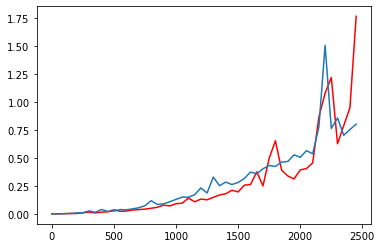

In [13]:
timesb = []
for i in range(0,2500,50):
    l = [k for k in range(i,0,-1)]
    s = time.perf_counter()   #start timer
    quick_sort(l, 0, len(l)-1)
    e = time.perf_counter()  #end timer
    timesb.append(e-s)

plt.plot(list(range(0,2500,50)),timesb, c="red") + plt.plot(list(range(0,2500,50)),times)   